In [2]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    roc_auc_score, roc_curve,
    precision_score,
    recall_score,
    classification_report
)
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
feature_train = torch.load('D:/github/medical_image_classification/train_extracted_feat/features (1).pt')
label_train = torch.load('D:/github/medical_image_classification/train_extracted_feat/labels.pt')
feature_test = torch.load("D:/github/medical_image_classification/train_extracted_feat/features_test.pth")
label_test = torch.load("D:/github/medical_image_classification/train_extracted_feat/labels_test.pth")

C:\Users\sauvi\AppData\Local\Temp\ipykernel_17060\2913441925.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  feature_train = torch.load('D:/github/medical_image_classifi

In [4]:
X_train = feature_train.numpy()
y_train = label_train.numpy()

In [5]:
X_test = feature_test.numpy()
y_test = label_test.numpy()

In [6]:
def _time(start, end): 
    # if in seconds 
    if (end-start)<60: 
        wall_time = f'{round((end-start),2)}sec'
    # if in minute(s)  
    elif (end-start)>=3600: 
        wall_time = f'{int((end-start)/3600)}h {int(((end-start)%3600)/60)}min {round((end-start)%60,2)}sec'
    # if in houre(s)  
    else: 
        wall_time = f'{int((end-start)/60)}min {round((end-start)%60,2)}sec'
    return wall_time

In [7]:
decision_tree = tree.DecisionTreeClassifier()

In [9]:
start = time.time()
decision_tree.fit(X_train, y_train)

print("Decision Tree Accuracy Score: ", decision_tree.score(X_test, y_test))
print("Time taken:", _time(start, time.time()))

Decision Tree Accuracy Score:  0.7243589743589743
Time taken: 4.7sec


In [11]:
y_pred=decision_tree.predict(X_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0
 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0
 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 

In [12]:
print(classification_report(y_test, y_pred, target_names=['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.79      0.36      0.49       234
   Pneumonia       0.71      0.94      0.81       390

    accuracy                           0.72       624
   macro avg       0.75      0.65      0.65       624
weighted avg       0.74      0.72      0.69       624



In [13]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.7412
Recall: 0.7244
F1-score: 0.6919


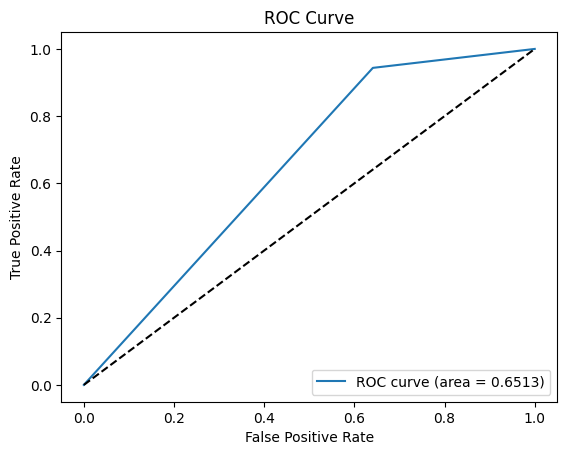

ROC-AUC Score: 0.6513


In [14]:
# Compute ROC-AUC Curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")